<a href="https://colab.research.google.com/github/Tonry12/Data_joyx2/blob/main/Lottery_Prediction_model_LSTM_(-1)(100)(0.01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PrepareDATA

Link: https://medium.com/@polanitzer/forecasting-the-next-winning-numbers-in-the-texas-lottery-mega-millions-drawing-using-a-deep-4c37ee6d30f0

In [596]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [597]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle

In [598]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [599]:
lotto = pd.read_csv('/content/drive/MyDrive/SPN/Predictive lottery.xlsx - since 30 years ago.csv')

In [600]:
lotto = lotto.drop(columns=['Date','Unnamed: 1','Unnamed: 2','Unnamed: 3'])

In [601]:
lotto

,DATE,รางวัลที่ 1,2 ตัวบน,3 ตัวบน,2 ตัวล่าง,3 ตัวหน้า,3 ตัวหน้า.1,3 ตัวล่าง,3 ตัวล่าง.1,weekday_dum,weekday
0,5/16/2024,205690,90,690,60,747,885,70,137,7,Saturday
1,5/2/2024,980116,16,116,17,104,763,634,833,4,Wednesday
2,4/16/2024,943598,98,598,79,727,729,154,200,3,Tuesday
3,4/1/2024,803481,81,481,90,122,809,559,947,2,Monday
4,3/16/2024,997626,26,626,78,509,571,329,794,7,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
717,5/16/1994,2071764,64,764,29,93,544,535,746,2,Monday
718,5/2/1994,3072877,77,877,69,535,317,170,521,2,Monday
719,4/16/1994,7893913,13,913,21,785,982,151,594,7,Saturday
720,4/1/1994,4269815,15,815,29,675,35,704,868,6,Friday


In [602]:
lotto.rename(columns={'DATE': 'Date','รางวัลที่ 1': '1st','3 ตัวบน':'top3','2 ตัวล่าง':'up2'},inplace=True)

In [603]:
lotto

,Date,1st,2 ตัวบน,top3,up2,3 ตัวหน้า,3 ตัวหน้า.1,3 ตัวล่าง,3 ตัวล่าง.1,weekday_dum,weekday
0,5/16/2024,205690,90,690,60,747,885,70,137,7,Saturday
1,5/2/2024,980116,16,116,17,104,763,634,833,4,Wednesday
2,4/16/2024,943598,98,598,79,727,729,154,200,3,Tuesday
3,4/1/2024,803481,81,481,90,122,809,559,947,2,Monday
4,3/16/2024,997626,26,626,78,509,571,329,794,7,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
717,5/16/1994,2071764,64,764,29,93,544,535,746,2,Monday
718,5/2/1994,3072877,77,877,69,535,317,170,521,2,Monday
719,4/16/1994,7893913,13,913,21,785,982,151,594,7,Saturday
720,4/1/1994,4269815,15,815,29,675,35,704,868,6,Friday


In [604]:
ls= lotto.iloc[:,9:11]

In [605]:
lu= lotto.iloc[:,0:5]

In [606]:
lt = pd.concat([lu, ls], axis=1)

In [607]:
lt

,Date,1st,2 ตัวบน,top3,up2,weekday_dum,weekday
0,5/16/2024,205690,90,690,60,7,Saturday
1,5/2/2024,980116,16,116,17,4,Wednesday
2,4/16/2024,943598,98,598,79,3,Tuesday
3,4/1/2024,803481,81,481,90,2,Monday
4,3/16/2024,997626,26,626,78,7,Saturday
...,...,...,...,...,...,...,...
717,5/16/1994,2071764,64,764,29,2,Monday
718,5/2/1994,3072877,77,877,69,2,Monday
719,4/16/1994,7893913,13,913,21,7,Saturday
720,4/1/1994,4269815,15,815,29,6,Friday


In [608]:
lt = lt.drop(columns=['2 ตัวบน'])

In [609]:
more = lt[lt['1st'] >= 999999]
more.count()

Date           20
1st            20
top3           20
up2            20
weekday_dum    20
weekday        20
dtype: int64

In [610]:
lt = lt[lt['1st'] <= 999999]

In [611]:
lt['up2'] = lt['up2'].apply(lambda x: '{:02}'.format(x))

In [612]:
lt['top3'] = lt['top3'].apply(lambda x: '{:03}'.format(x))

In [613]:
lt['Date'] = pd.to_datetime(lt['Date'])

In [614]:
lt['Year'] = pd.to_datetime(lt['Date']).dt.year
lt['Month'] = pd.to_datetime(lt['Date']).dt.month
lt['Day'] = pd.to_datetime(lt['Date']).dt.day

In [615]:
lt_1 = lt.copy()

In [616]:
lt_1['up2'] = lt_1['up2'].astype(str)

# Split each value in the 'digi' column into its individual digits
lt_1['Tens digit'] = lt_1['up2'].apply(lambda x: int(x[0]))
lt_1['Units digit'] = lt_1['up2'].apply(lambda x: int(x[1]) if len(x) > 1 else 0)

In [617]:
lt_1['top3'] = lt_1['top3'].astype(str)

# Split each value in the 'digi' column into its individual digits
lt_1['c3_r1'] = lt_1['top3'].apply(lambda x: int(x[0]))
lt_1['c3_r2'] = lt_1['top3'].apply(lambda x: int(x[1]))
lt_1['c3_r3'] = lt_1['top3'].apply(lambda x: int(x[2]))

In [618]:
lt_2 = lt_1.copy()

# LSTM Model

In [619]:
lt_2

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-05-16,205690,690,60,7,Saturday,2024,5,16,6,0,6,9,0
1,2024-05-02,980116,116,17,4,Wednesday,2024,5,2,1,7,1,1,6
2,2024-04-16,943598,598,79,3,Tuesday,2024,4,16,7,9,5,9,8
3,2024-04-01,803481,481,90,2,Monday,2024,4,1,9,0,4,8,1
4,2024-03-16,997626,626,78,7,Saturday,2024,3,16,7,8,6,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,1995-03-16,646847,847,67,5,Thursday,1995,3,16,6,7,8,4,7
698,1995-03-01,411454,454,71,4,Wednesday,1995,3,1,7,1,4,5,4
699,1995-02-16,869070,070,95,5,Thursday,1995,2,16,9,5,0,7,0
700,1995-02-01,198162,162,48,4,Wednesday,1995,2,1,4,8,1,6,2


In [620]:
sh = lt_2.shape

In [621]:
z = 0

In [622]:
lt_3 = lt_2.iloc[z:sh[0], 0:sh[1]]

In [623]:
lt_3

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-05-16,205690,690,60,7,Saturday,2024,5,16,6,0,6,9,0
1,2024-05-02,980116,116,17,4,Wednesday,2024,5,2,1,7,1,1,6
2,2024-04-16,943598,598,79,3,Tuesday,2024,4,16,7,9,5,9,8
3,2024-04-01,803481,481,90,2,Monday,2024,4,1,9,0,4,8,1
4,2024-03-16,997626,626,78,7,Saturday,2024,3,16,7,8,6,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,1995-03-16,646847,847,67,5,Thursday,1995,3,16,6,7,8,4,7
698,1995-03-01,411454,454,71,4,Wednesday,1995,3,1,7,1,4,5,4
699,1995-02-16,869070,070,95,5,Thursday,1995,2,16,9,5,0,7,0
700,1995-02-01,198162,162,48,4,Wednesday,1995,2,1,4,8,1,6,2


## ไม่ล่วงหน้า

In [624]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [625]:
dfp = lt_3.copy()

In [626]:
df = dfp.reset_index()

In [627]:
df

,index,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,0,2024-05-16,205690,690,60,7,Saturday,2024,5,16,6,0,6,9,0
1,1,2024-05-02,980116,116,17,4,Wednesday,2024,5,2,1,7,1,1,6
2,2,2024-04-16,943598,598,79,3,Tuesday,2024,4,16,7,9,5,9,8
3,3,2024-04-01,803481,481,90,2,Monday,2024,4,1,9,0,4,8,1
4,4,2024-03-16,997626,626,78,7,Saturday,2024,3,16,7,8,6,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,697,1995-03-16,646847,847,67,5,Thursday,1995,3,16,6,7,8,4,7
698,698,1995-03-01,411454,454,71,4,Wednesday,1995,3,1,7,1,4,5,4
699,699,1995-02-16,869070,070,95,5,Thursday,1995,2,16,9,5,0,7,0
700,700,1995-02-01,198162,162,48,4,Wednesday,1995,2,1,4,8,1,6,2


In [628]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [629]:
df2 = df.copy()

In [630]:
df1 = df.copy()
df.drop(['index','Date','1st','weekday_dum','weekday','Year','Month','Day','Tens digit','Units digit','c3_r1','c3_r2','c3_r3'], axis=1, inplace=True)

number_of_features = df.shape[1]

In [631]:
df

,top3,up2
0,690,60
1,116,17
2,598,79
3,481,90
4,626,78
...,...,...
697,847,67
698,454,71
699,070,95
700,162,48


In [632]:
df1.drop(['index','1st','weekday_dum','weekday','Year','Month','Day','Tens digit','Units digit','c3_r1','c3_r2','c3_r3'], axis=1, inplace=True)

In [633]:
df1

,Date,top3,up2
0,2024-05-16,690,60
1,2024-05-02,116,17
2,2024-04-16,598,79
3,2024-04-01,481,90
4,2024-03-16,626,78
...,...,...,...
697,1995-03-16,847,67
698,1995-03-01,454,71
699,1995-02-16,070,95
700,1995-02-01,162,48


In [634]:
window_length = 7
window_length

7

In [635]:
train = df.copy()
train.head((window_length+1))

,top3,up2
0,690,60
1,116,17
2,598,79
3,481,90
4,626,78
5,603,79
6,395,43
7,063,09


In [636]:
train_rows = train.values.shape[0]
train_samples = np.empty([ train_rows - window_length, window_length, number_of_features], dtype=float)
train_labels = np.empty([ train_rows - window_length, number_of_features], dtype=float)
for i in range(0, train_rows-window_length):
    train_samples[i] = train.iloc[i : i+window_length, 0 : number_of_features]
    train_labels[i] = train.iloc[i+window_length : i+window_length+1, 0 : number_of_features]

In [637]:
train.values.shape[0]

702

In [638]:
train_samples[0]

array([[690.,  60.],
       [116.,  17.],
       [598.,  79.],
       [481.,  90.],
       [626.,  78.],
       [603.,  79.],
       [395.,  43.]])

In [639]:
train_labels[0]

array([63.,  9.])

In [640]:
scaler = StandardScaler()
transformed_dataset = scaler.fit_transform(train.values)
scaled_train_samples = pd.DataFrame(data=transformed_dataset, index=train.index)

In [641]:
scaled_train_samples.head(window_length+1)

,0,1
0,0.646511,0.279825
1,-1.380838,-1.210434
2,0.321570,0.938311
3,-0.091670,1.319540
4,0.420465,0.903654
5,0.339230,0.938311
6,-0.395419,-0.309348
7,-1.568032,-1.487692


In [642]:
x_train = np.empty([ train_rows - window_length, window_length, number_of_features], dtype=float)
y_train = np.empty([ train_rows - window_length, number_of_features], dtype=float)

for i in range(0, train_rows-window_length):
    x_train[i] = scaled_train_samples.iloc[i : i+window_length, 0 : number_of_features]
    y_train[i] = scaled_train_samples.iloc[i+window_length : i+window_length+1, 0 : number_of_features]

In [643]:
y_train

array([[-1.56803198, -1.48769192],
       [ 1.66724904,  0.3144819 ],
       [ 0.13084375,  1.28488319],
       ...,
       [-1.54330822,  1.49282632],
       [-1.21836733, -0.13606156],
       [-0.42014297, -0.41331907]])

In [644]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import mse

In [645]:
# Initialising the RNN
model = Sequential()
# Adding the input layer and the LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a first Dropout layer
model.add(Dropout(0.2))
# Adding a second LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a second Dropout layer
model.add(Dropout(0.2))
# Adding a third LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a fourth LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = False)))
# Adding a third Dropout layer
model.add(Dropout(0.2))
# Adding the first output layer
model.add(Dense(70))
# Adding the last output layer
model.add(Dense(number_of_features))


In [646]:
model.compile(optimizer=Adam(learning_rate=0.005), loss ='mse', metrics=['accuracy'])

In [647]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, verbose=2)

Epoch 1/100
6/6 - 20s - loss: 1.0747 - accuracy: 0.4820 - 20s/epoch - 3s/step
Epoch 2/100
6/6 - 3s - loss: 1.0091 - accuracy: 0.5194 - 3s/epoch - 565ms/step
Epoch 3/100
6/6 - 3s - loss: 1.0156 - accuracy: 0.4791 - 3s/epoch - 467ms/step
Epoch 4/100
6/6 - 3s - loss: 1.0115 - accuracy: 0.5036 - 3s/epoch - 469ms/step
Epoch 5/100
6/6 - 3s - loss: 1.0153 - accuracy: 0.4619 - 3s/epoch - 529ms/step
Epoch 6/100
6/6 - 4s - loss: 1.0066 - accuracy: 0.5065 - 4s/epoch - 745ms/step
Epoch 7/100
6/6 - 3s - loss: 0.9952 - accuracy: 0.5036 - 3s/epoch - 469ms/step
Epoch 8/100
6/6 - 3s - loss: 1.0100 - accuracy: 0.5050 - 3s/epoch - 473ms/step
Epoch 9/100
6/6 - 3s - loss: 1.0097 - accuracy: 0.4561 - 3s/epoch - 469ms/step
Epoch 10/100
6/6 - 4s - loss: 0.9993 - accuracy: 0.5094 - 4s/epoch - 679ms/step
Epoch 11/100
6/6 - 4s - loss: 0.9980 - accuracy: 0.5094 - 4s/epoch - 602ms/step
Epoch 12/100
6/6 - 3s - loss: 0.9969 - accuracy: 0.5122 - 3s/epoch - 470ms/step
Epoch 13/100
6/6 - 3s - loss: 0.9974 - accuracy: 0

### Prediction without rounding up or down the results

In [648]:
print('-' * 40)
print('Prediction vs. GoundTruth without rounding up or down')
for i in range(1,10):
  test = df1.copy()
  test = test.tail((window_length+10-i))
  test = test.head((window_length+1))
  test_Date = df1.iloc[ (test.tail().index[-1]) ]['Date']
  test1 = test.head((window_length))
  test1.drop(['Date'], axis=1, inplace=True)
  test1 = np.array(test1)
  x_test = scaler.transform(test1)
  y_test_pred = model.predict(np.array([x_test]))
  y_test_true = test.drop(['Date'], axis=1, inplace=True)
  y_test_true = test.tail(1)
  print('Drawing  Date', test_Date)
  print('Prediction:\t', scaler.inverse_transform(y_test_pred).astype(int)[0])
  print('GoundTruth:\t', np.array(y_test_true)[0])
  print('-' * 40)

----------------------------------------
Prediction vs. GoundTruth without rounding up or down
1/1 [==============================] - 3s 3s/step
Drawing  Date 1995-05-17 00:00:00
Prediction:	 [410  56]
GoundTruth:	 ['381' '55']
----------------------------------------
1/1 [==============================] - 0s 34ms/step
Drawing  Date 1995-05-02 00:00:00
Prediction:	 [677  88]
GoundTruth:	 ['692' '88']
----------------------------------------
1/1 [==============================] - 0s 31ms/step
Drawing  Date 1995-04-16 00:00:00
Prediction:	 [586 104]
GoundTruth:	 ['581' '99']
----------------------------------------
1/1 [==============================] - 0s 30ms/step
Drawing  Date 1995-04-01 00:00:00
Prediction:	 [52  4]
GoundTruth:	 ['039' '06']
----------------------------------------
1/1 [==============================] - 0s 30ms/step
Drawing  Date 1995-03-16 00:00:00
Prediction:	 [837  68]
GoundTruth:	 ['847' '67']
----------------------------------------
1/1 [========================

### Prediction with rounding up the results

In [649]:
print('-' * 40)
print('Prediction vs. GoundTruth with rounding up')
for i in range(1,10):
  test = df1.copy()
  test = test.tail((window_length+10-i))
  test = test.head((window_length+1))
  test_Date = df1.iloc[ (test.tail().index[-1]) ]['Date']
  test1 = test.head((window_length))
  test1.drop(['Date'], axis=1, inplace=True)
  test1 = np.array(test1)
  x_test = scaler.transform(test1)
  y_test_pred = model.predict(np.array([x_test]))
  y_test_true = test.drop(['Date'], axis=1, inplace=True)
  y_test_true = test.tail(1)
  print('Drawing  Date', test_Date)
  print('Prediction:\t', scaler.inverse_transform(y_test_pred).astype(int)[0]+1)
  print('GoundTruth:\t', np.array(y_test_true)[0])
  print('-' * 40)

----------------------------------------
Prediction vs. GoundTruth with rounding up
1/1 [==============================] - 0s 30ms/step
Drawing  Date 1995-05-17 00:00:00
Prediction:	 [411  57]
GoundTruth:	 ['381' '55']
----------------------------------------
1/1 [==============================] - 0s 29ms/step
Drawing  Date 1995-05-02 00:00:00
Prediction:	 [678  89]
GoundTruth:	 ['692' '88']
----------------------------------------
1/1 [==============================] - 0s 30ms/step
Drawing  Date 1995-04-16 00:00:00
Prediction:	 [587 105]
GoundTruth:	 ['581' '99']
----------------------------------------
1/1 [==============================] - 0s 32ms/step
Drawing  Date 1995-04-01 00:00:00
Prediction:	 [53  5]
GoundTruth:	 ['039' '06']
----------------------------------------
1/1 [==============================] - 0s 31ms/step
Drawing  Date 1995-03-16 00:00:00
Prediction:	 [838  69]
GoundTruth:	 ['847' '67']
----------------------------------------
1/1 [==============================] -

### Predict the Future Drawing Results on June 1, 2o24

In [650]:
next_Date = '2024-06-01'

In [651]:

print('-' * 40)
print('Predict the Future Drawing on 4/16/2024')
next = df.copy()
next = next.tail((window_length))
next = np.array(next)
x_next = scaler.transform(next)
y_next_pred = model.predict(np.array([x_next]))
print('Drawing  Date', next_Date)
print('Prediction without rounding up or down:\t', scaler.inverse_transform(y_next_pred).astype(int)[0])
print('Prediction with rounding up           :\t', scaler.inverse_transform(y_next_pred).astype(int)[0]+1)
print('Prediction with rounding down         :\t', scaler.inverse_transform(y_next_pred).astype(int)[0]-1)
print('-' * 40)

----------------------------------------
Predict the Future Drawing on 4/16/2024
1/1 [==============================] - 0s 37ms/step
Drawing  Date 2024-06-01
Prediction without rounding up or down:	 [596  64]
Prediction with rounding up           :	 [597  65]
Prediction with rounding down         :	 [595  63]
----------------------------------------


In [652]:
filtered_df = lt_2[lt_2['Date'] == next_Date]
g = filtered_df[['Date', 'top3', 'up2']]
g

,Date,top3,up2


# Evaluate

In [653]:
evalu = {
    'รอบที่': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'บน': [420, 668, 448, 294, 281, 481, 288, 545, 542, 596],
    'ล่าง': [77, 66, 62, 53, 67, 65, 49, 84, 74, 64],
    'accuracy': [0.9626, 0.9482, 0.9626, 0.964, 0.9698, 0.9712, 0.954, 0.9583, 0.9727, 0.9482]
}

# Convert dictionary to DataFrame
evaluate = pd.DataFrame(evalu)

In [661]:
df = evaluate.copy()

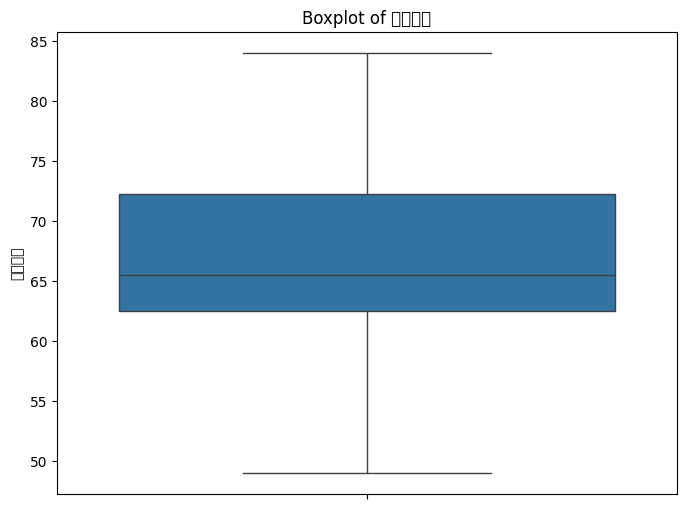

In [656]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=evaluate['ล่าง'])
plt.title('Boxplot of ล่าง')
plt.ylabel('ล่าง')
plt.show()

In [663]:
# Calculate descriptive statistics
min_value = df['ล่าง'].min()
max_value = df['ล่าง'].max()
mean_value = df['ล่าง'].mean()
q1 = df['ล่าง'].quantile(0.25)
q2 = df['ล่าง'].median()
q3 = df['ล่าง'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Determine outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df['ล่าง'][(df['ล่าง'] < lower_bound) | (df['ล่าง'] > upper_bound)]

# Print the results
print(f'Min value: {min_value}')
print(f'Max value: {max_value}')
print(f'Mean value: {mean_value}')
print(f'Q1 (25th percentile): {q1}')
print(f'Q2 (median, 50th percentile): {q2}')
print(f'Q3 (75th percentile): {q3}')
print(f'Outliers: {outliers.values}')

Min value: 49
Max value: 84
Mean value: 66.1
Q1 (25th percentile): 62.5
Q2 (median, 50th percentile): 65.5
Q3 (75th percentile): 72.25
Outliers: []


In [664]:
# Calculate descriptive statistics for 'บน'
min_value = df['บน'].min()
max_value = df['บน'].max()
mean_value = df['บน'].mean()
q1 = df['บน'].quantile(0.25)
q2 = df['บน'].median()
q3 = df['บน'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Determine outliers for 'บน'
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df['บน'][(df['บน'] < lower_bound) | (df['บน'] > upper_bound)]

# Print the results for 'บน'
print(f'Min value: {min_value}')
print(f'Max value: {max_value}')
print(f'Mean value: {mean_value}')
print(f'Q1 (25th percentile): {q1}')
print(f'Q2 (median, 50th percentile): {q2}')
print(f'Q3 (75th percentile): {q3}')
print(f'Outliers: {outliers.values}')

Min value: 281
Max value: 668
Mean value: 456.3
Q1 (25th percentile): 325.5
Q2 (median, 50th percentile): 464.5
Q3 (75th percentile): 544.25
Outliers: []
